# WeatherPy

---

## Visualization of over 500 cities of varying distances from the equator analyzing the question of 'What is the weather like as we get closer to the equator?"

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mount isa
Processing Record 2 of Set 1 | palafrugell
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | bengkulu
Processing Record 7 of Set 1 | kahului
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | katsuura
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | lake charles
Processing Record 17 of Set 1 | santa helena
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | korla
Processing Record 21 of Set 1 | media luna
Processin

Processing Record 38 of Set 4 | cidreira
Processing Record 39 of Set 4 | rovaniemi
Processing Record 40 of Set 4 | saleaula
City not found. Skipping...
Processing Record 41 of Set 4 | guiren
Processing Record 42 of Set 4 | luoyang
Processing Record 43 of Set 4 | poum
Processing Record 44 of Set 4 | bilma
Processing Record 45 of Set 4 | nishihara
Processing Record 46 of Set 4 | maltahohe
Processing Record 47 of Set 4 | tevaitoa
Processing Record 48 of Set 4 | lasa
Processing Record 49 of Set 4 | salekhard
Processing Record 0 of Set 5 | chimbote
Processing Record 1 of Set 5 | liuzhou
Processing Record 2 of Set 5 | durban
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | tunduru
City not found. Skipping...
Processing Record 5 of Set 5 | saskylakh
Processing Record 6 of Set 5 | kyren
Processing Record 7 of Set 5 | huarmey
Processing Record 8 of Set 5 | bjornevatn
Processing Record 9 of Set 5 | trofors
Processing Record 10 of Set 5 | paamiut
Processing Record 11 of Set 5

Processing Record 25 of Set 8 | peniche
Processing Record 26 of Set 8 | altamira
Processing Record 27 of Set 8 | huilong
Processing Record 28 of Set 8 | port-gentil
Processing Record 29 of Set 8 | malwan
City not found. Skipping...
Processing Record 30 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 31 of Set 8 | letka
Processing Record 32 of Set 8 | hailey
Processing Record 33 of Set 8 | jalu
Processing Record 34 of Set 8 | tiarei
Processing Record 35 of Set 8 | ha tinh
Processing Record 36 of Set 8 | muros
Processing Record 37 of Set 8 | kununurra
Processing Record 38 of Set 8 | odweyne
Processing Record 39 of Set 8 | ust-tsilma
Processing Record 40 of Set 8 | yerbogachen
Processing Record 41 of Set 8 | aykino
Processing Record 42 of Set 8 | qiongshan
Processing Record 43 of Set 8 | west bay
Processing Record 44 of Set 8 | rosarito
Processing Record 45 of Set 8 | broken hill
Processing Record 46 of Set 8 | los llanos de aridane
Processing Record 47 of Set 8 | bouc

City not found. Skipping...
Processing Record 14 of Set 12 | manama
Processing Record 15 of Set 12 | gladstone
Processing Record 16 of Set 12 | samandag
Processing Record 17 of Set 12 | atambua
Processing Record 18 of Set 12 | balabac
Processing Record 19 of Set 12 | lazaro cardenas
Processing Record 20 of Set 12 | maniitsoq
Processing Record 21 of Set 12 | acari
Processing Record 22 of Set 12 | uddevalla
Processing Record 23 of Set 12 | makakilo city
Processing Record 24 of Set 12 | chaozhou
Processing Record 25 of Set 12 | tivaouane
Processing Record 26 of Set 12 | neryungri
Processing Record 27 of Set 12 | hualmay
Processing Record 28 of Set 12 | opuwo
Processing Record 29 of Set 12 | borogontsy
Processing Record 30 of Set 12 | teahupoo
Processing Record 31 of Set 12 | lokosovo
Processing Record 32 of Set 12 | sioux lookout
Processing Record 33 of Set 12 | moron
Processing Record 34 of Set 12 | bontang
Processing Record 35 of Set 12 | san policarpo
Processing Record 36 of Set 12 | k

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mount isa,-20.7333,139.5000,24.87,57,10,3.60,AU,1680119429
1,palafrugell,41.9174,3.1631,14.42,52,12,2.24,ES,1680119430
2,saint george,37.1041,-113.5841,19.58,26,0,5.14,US,1680119268
3,port alfred,-33.5906,26.8910,15.66,71,100,2.68,ZA,1680119430
4,albany,42.6001,-73.9662,13.23,32,97,2.24,US,1680119430


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount isa,-20.7333,139.5000,24.87,57,10,3.60,AU,1680119429
1,palafrugell,41.9174,3.1631,14.42,52,12,2.24,ES,1680119430
2,saint george,37.1041,-113.5841,19.58,26,0,5.14,US,1680119268
3,port alfred,-33.5906,26.8910,15.66,71,100,2.68,ZA,1680119430
4,albany,42.6001,-73.9662,13.23,32,97,2.24,US,1680119430


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

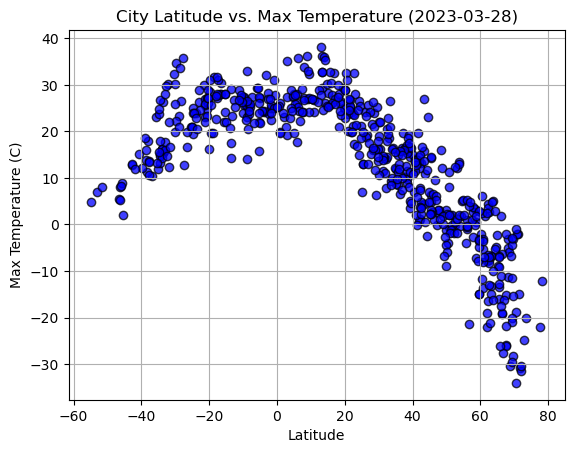

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-03-28)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

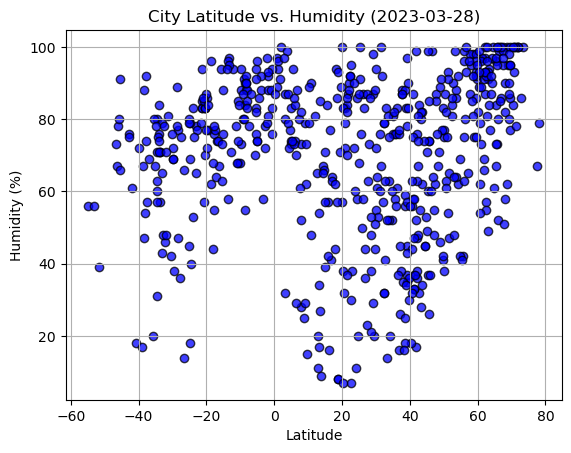

In [9]:
# Build the scatter plots for latitude vs. humidity
humidity_values = city_data_df['Humidity']
plt.scatter(x_values,humidity_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-03-28)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

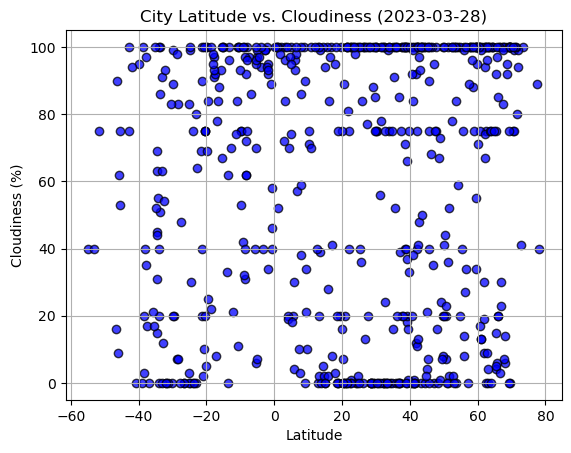

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloud_values = city_data_df['Cloudiness']
plt.scatter(x_values,cloud_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-03-28)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

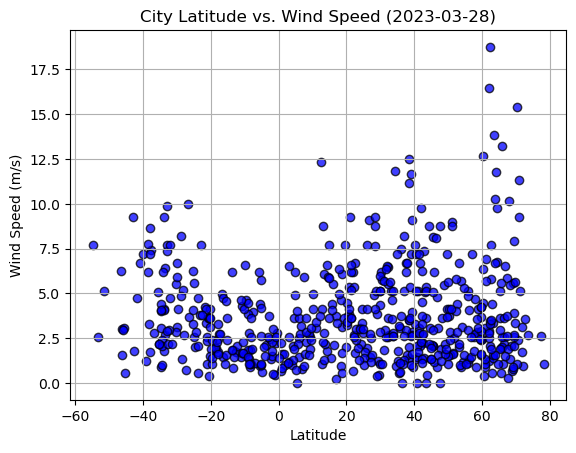

In [11]:
# Build the scatter plots for latitude vs. wind speed
wind_speed_values = city_data_df['Wind Speed']
plt.scatter(x_values,wind_speed_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-03-28)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,palafrugell,41.9174,3.1631,14.42,52,12,2.24,ES,1680119430
2,saint george,37.1041,-113.5841,19.58,26,0,5.14,US,1680119268
4,albany,42.6001,-73.9662,13.23,32,97,2.24,US,1680119430
6,kahului,20.8947,-156.4700,26.65,72,20,5.36,US,1680119428
7,jamestown,42.0970,-79.2353,7.80,47,75,9.77,US,1680119385


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount isa,-20.7333,139.5000,24.87,57,10,3.60,AU,1680119429
3,port alfred,-33.5906,26.8910,15.66,71,100,2.68,ZA,1680119430
5,bengkulu,-3.8004,102.2655,24.22,88,94,2.10,ID,1680119211
8,rikitea,-23.1203,-134.9692,26.35,78,80,3.79,PF,1680119431
9,ushuaia,-54.8000,-68.3000,4.81,56,40,7.72,AR,1680119431


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.795860918837754


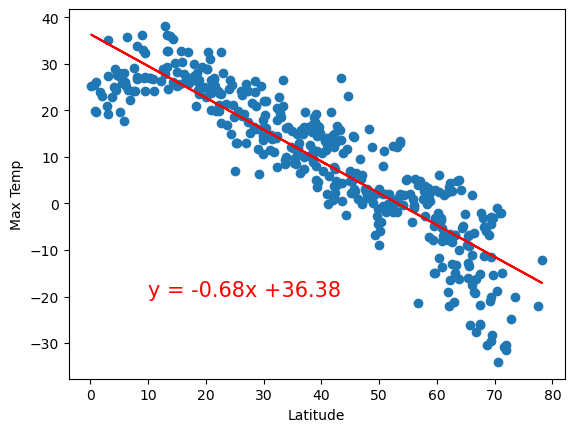

In [14]:
# Linear regression on Northern Hemisphere
northern_lat = northern_hemi_df['Lat']
northern_temp_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_lat, northern_temp_values)
regress_values = northern_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(northern_lat,northern_temp_values)
plt.plot(northern_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.4170401432841184


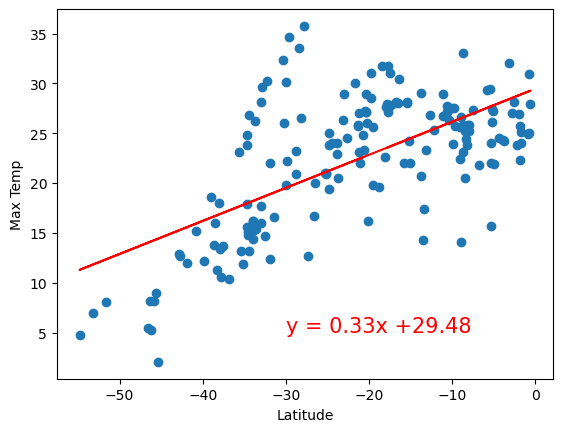

In [15]:
# Linear regression on Southern Hemisphere
southern_lat = southern_hemi_df['Lat']
southern_temp_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_lat, southern_temp_values)
regress_values = southern_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(southern_lat,southern_temp_values)
plt.plot(southern_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** When reviewing the relationship between latitude and max-temperature in the northern hemisphere, there is a possible positive correlation given the r-value of .79. This can represent some relationship where as we move further away from the equator, temperature decreases in the northern hemishpere. When reviewing the relationship between latitude and the maximum temperature in the southern hemisphere, the correlation is low with an r-value of .42.There is a slight positive correlation as the latitude gets closer to the equator, temperture increases. However, given the low r-value, there is a larger amount of variance than in the northern hemishere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08749460287652963


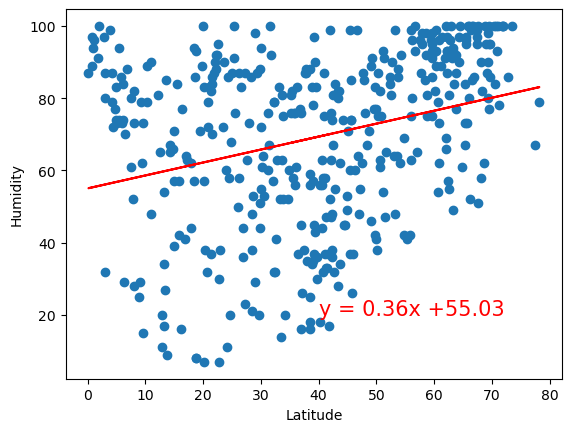

In [16]:
# Northern Hemisphere
northern_lat = northern_hemi_df['Lat']
northern_humidity_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_lat, northern_humidity_values)
regress_values = northern_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(northern_lat,northern_humidity_values)
plt.plot(northern_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.20927676282711596


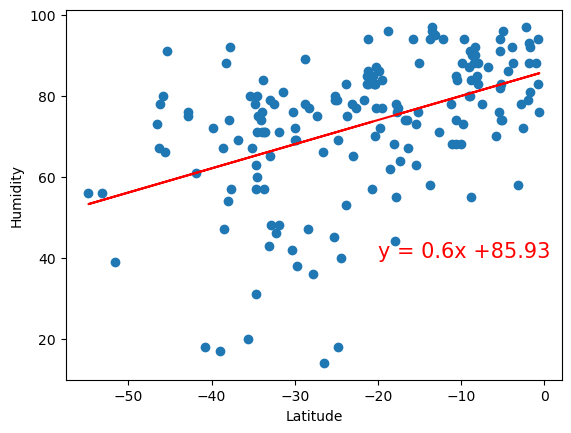

In [17]:
# Southern Hemisphere
southern_lat = southern_hemi_df['Lat']
southern_humidity_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_lat, southern_humidity_values)
regress_values = southern_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(southern_lat,southern_humidity_values)
plt.plot(southern_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** When evaluating a correlation between humidity and the latitude in the southern and northern hemisheres, both hemispheres show a low r-value meaning there is no significant relationship between the two variables.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.008646258935909057


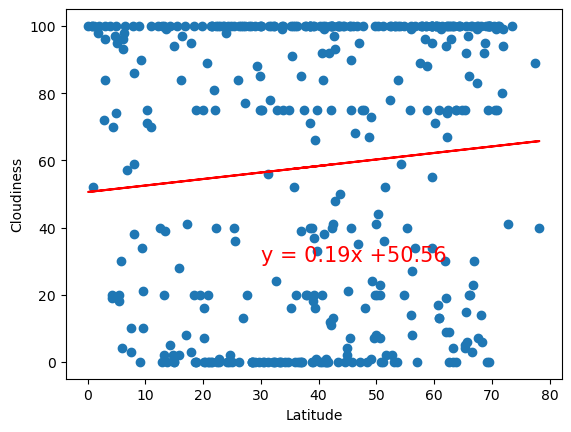

In [18]:
# Northern Hemisphere
northern_lat = northern_hemi_df['Lat']
northern_cloudiness_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_lat, northern_cloudiness_values)
regress_values = northern_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(northern_lat,northern_cloudiness_values)
plt.plot(northern_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(30,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.09471730177092205


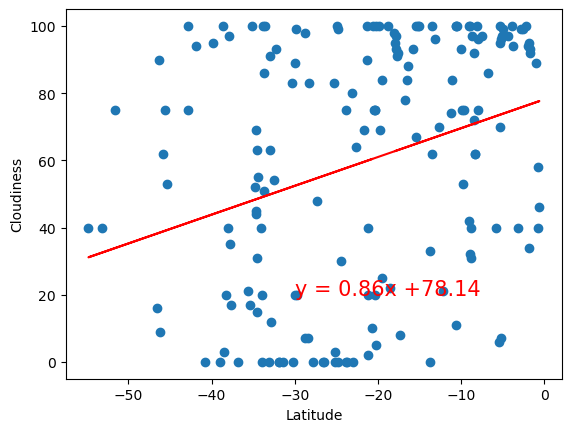

In [19]:
# Southern Hemisphere
southern_lat = southern_hemi_df['Lat']
southern_cloudiness_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_lat, southern_cloudiness_values)
regress_values = southern_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(southern_lat,southern_cloudiness_values)
plt.plot(southern_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** When evaluating the relationship between latitude and cloudiness in both the nrothern and southern hemispheres, the low r-values show there is a high variance and no relationship is shown between the two variables. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.009171166925700198


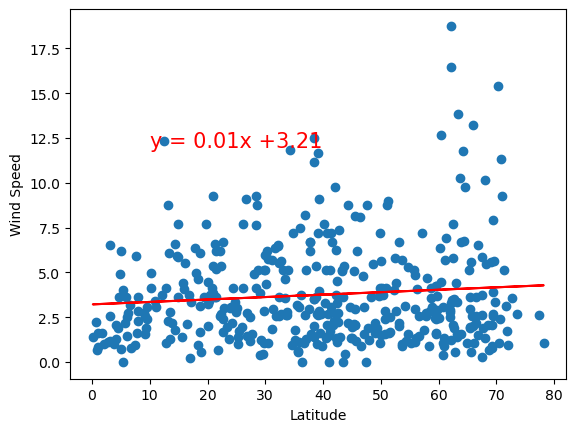

In [20]:
# Northern Hemisphere
northern_lat = northern_hemi_df['Lat']
northern_wind_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_lat, northern_wind_values)
regress_values = northern_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(northern_lat,northern_wind_values)
plt.plot(northern_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10,12),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.154341785448511


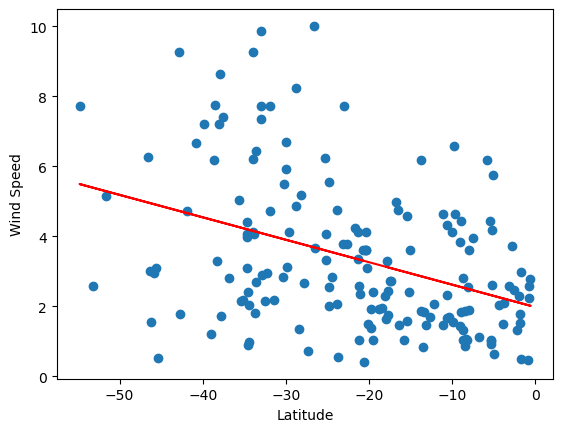

In [21]:
# Southern Hemisphere
southern_lat = southern_hemi_df['Lat']
southern_wind_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_lat, southern_wind_values)
regress_values = southern_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(southern_lat,southern_wind_values)
plt.plot(southern_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** When reviewing the relationship between wind speed and latitude in the northern hemisphere, there is no correlation between the two values with an r-value .01. When reviewing the display of data, it can be seen that wind speeds potentially stay below 10 in the northern hemishpere. When reviewing the relationship between wind speed and latitude in teh southern hemisphere, there is no correlation between the two variables with an r-value of .15, but the linear regression does show a potential trend where as latitude decreases, so does wind speed.